In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pathlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/Dataset/Training_Data"
test_dir="/content/drive/MyDrive/Dataset/Test_Data"

IMG_SIZE = 224

In [ ]:
img_height,img_width=IMG_SIZE,IMG_SIZE
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode = "categorical")

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1,
  label_mode = "categorical")

class_names = train_ds.class_names
print(class_names)

Found 251 files belonging to 5 classes.
Found 63 files belonging to 5 classes.
['antheacnose', 'bacterial leaf spot', 'cercospora', 'mottle virus', 'powdery mildew']


In [ ]:
num_classes = 5

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = inputs#img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [ ]:
model = build_model(num_classes)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/50
8/8 [==============================] - 59s 1s/step - loss: 1.8324 - accuracy: 0.4303 - val_loss: 1.1023 - val_accuracy: 0.5873
Epoch 2/50
8/8 [==============================] - 3s 190ms/step - loss: 0.6510 - accuracy: 0.7769 - val_loss: 1.1018 - val_accuracy: 0.5873
Epoch 3/50
8/8 [==============================] - 3s 185ms/step - loss: 0.4119 - accuracy: 0.8406 - val_loss: 1.0944 - val_accuracy: 0.5873
Epoch 4/50
8/8 [==============================] - 3s 185ms/step - loss: 0.2748 - accuracy: 0.8845 - val_loss: 1.1465 - val_accuracy: 0.5873
Epoch 5/50
8/8 [==============================] - 3s 188ms/step - loss: 0.2660 - accuracy: 0.9124 - val_loss: 1.1715 - val_accuracy: 0.5873
Epoch 6/50
8/8 [==============================] - 3s 184ms/step - loss: 0.2516 - accuracy: 0.9323 - val_loss: 1.1620 - val_accuracy: 0.6032
Epoch 7/50
8/8 [==============================] - 3s 193ms/step - loss: 0.2136 - accuracy: 0.9163 - val_loss: 1.1692 - val_accuracy: 0.6667
Epoch 8/50
8/8 [======

In [ ]:
print("Accuracy of the model is-" , model.evaluate(train_ds)[1]*100, "%")
print("loss of the model is-" , model.evaluate(test_ds)[0])

8/8 [==============================] - 2s 73ms/step - loss: 0.0267 - accuracy: 0.9841
Accuracy of the model is- 98.40637445449829 %
63/63 [==============================] - 1s 14ms/step - loss: 4.3607 - accuracy: 0.6190
loss of the model is- 4.360659599304199


In [ ]:
model.save('/content/drive/MyDrive/Database/KalEfficientNetB0.h5')

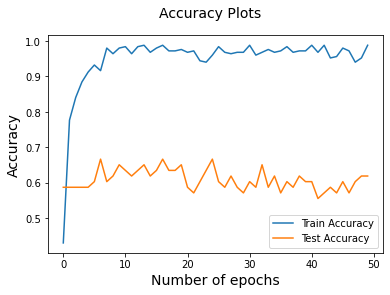

In [ ]:
plt.figure(figsize=(6,4))
plt.suptitle('Accuracy Plots', fontsize=14)
plt.subplot(1,1,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

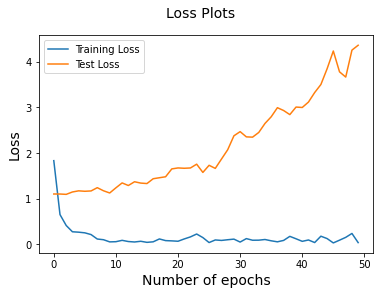

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(6,4))
plt.suptitle('Loss Plots', fontsize=14)
plt.subplot(1,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

plt.show()

